# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
data.shape[0]

45222

In [3]:
# The number of individuals making more than $50000 annually
(data['income'] == '>50K').sum()

11208

In [4]:
# The number of individuals making at most $50000 annually
(data['income'] == '<=50K').sum()

34014

In [5]:
# The percentage of individuals making at more than $50000 annually
(data['income'] == '>50K').sum() / data.shape[0]

0.2478439697492371

### Exercise 2 Preprocessing 

In [6]:
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

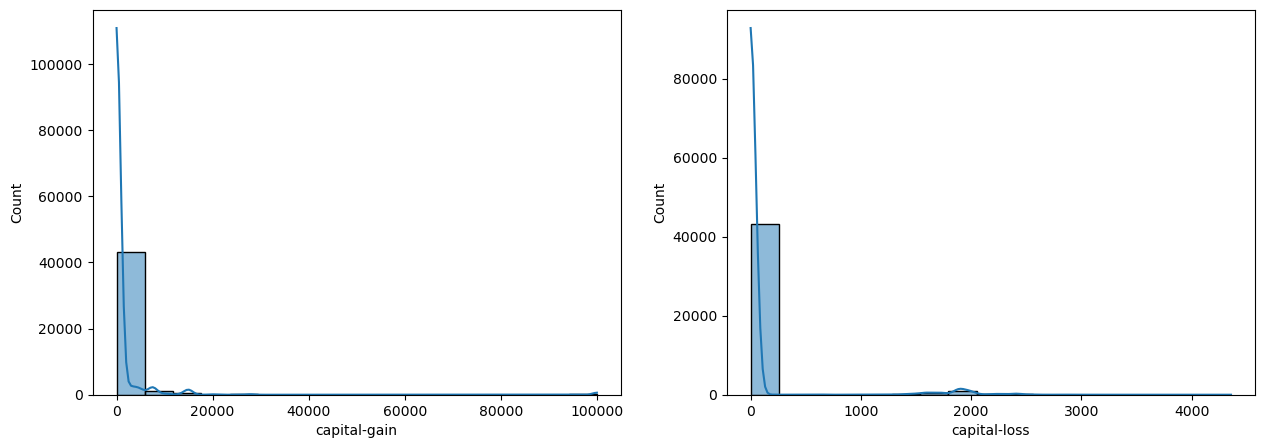

In [7]:
# Visualize skewed continuous features of original data
fig, axes = plt.subplots(1, 2, figsize=[15, 5])
sns.histplot(data['capital-gain'], kde=True, ax=axes[0])
sns.histplot(data['capital-loss'], kde=True, ax=axes[1])
plt.show()

In [17]:
# Outliers Treatment
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# plt.subplot(1, 2, 1)
# data['capital-gain'].plot.box()
# plt.subplot(1, 2, 2)
# data['capital-loss'].plot.box()
# plt.show()

data['log_gain'] = np.log(data['capital-gain'] + 1e-6)
data['log_loss'] = np.log(data['capital-loss'] + 1e-6)

data['Z_gain'] = stats.zscore(data['log_gain'])
data['Z_loss'] = stats.zscore(data['log_gain'])

df = data[(data['Z_gain'] > -3) & (data['Z_gain'] < 3) &
          (data['Z_loss'] > -3) & (data['Z_loss'] < 3)].drop(columns=['Z_gain', 'Z_loss']).copy()

data[(data['Z_gain'] < -3) | (data['Z_gain'] > 3) |
     (data['Z_loss'] < -3) | (data['Z_loss'] > 3)].shape[0]

3724

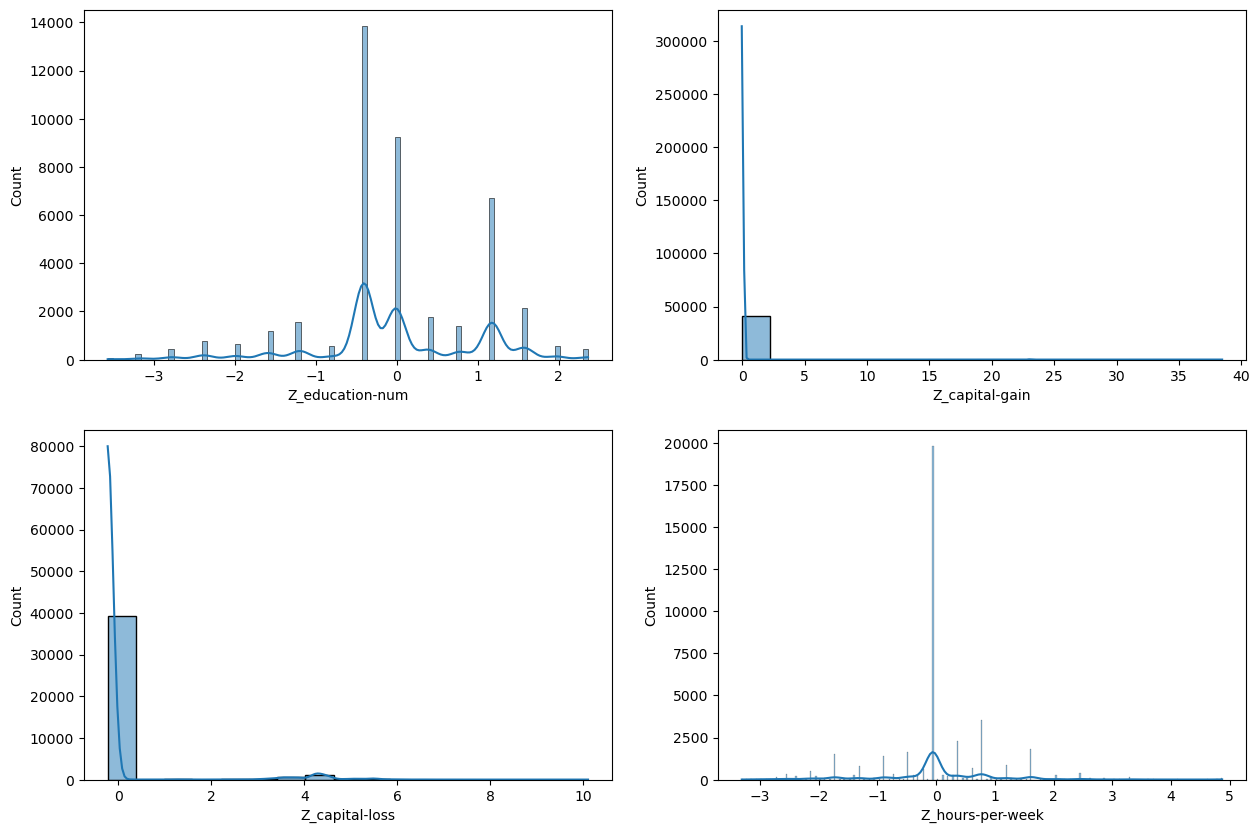

In [30]:
# Data Transformation
numeral = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Z_numeral = ['Z_education-num', 'Z_capital-gain', 'Z_capital-loss', 'Z_hours-per-week']
df[Z_numeral] = StandardScaler().fit_transform(df[numeral])
df[Z_numeral].head()
fig, axes = plt.subplots(2, 2, figsize=[15, 10])
sns.histplot(df['Z_education-num'], kde=True, ax=axes[0][0])
sns.histplot(df['Z_capital-gain'], kde=True, ax=axes[0][1])
sns.histplot(df['Z_capital-loss'], kde=True, ax=axes[1][0])
sns.histplot(df['Z_hours-per-week'], kde=True, ax=axes[1][1])
plt.show()

# Perform one-hot encoding on the data


### Exercise 3 Shuffle and Split Data

In [ ]:
# Split the 'feature' and 'income' data into training and testing sets
fin_df = 
X = fin_df.drop('Loan_Status', axis=1)
y = fin_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [ ]:
# Evaluating Model


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [ ]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

### Exercise 5 Evaluating Model 

## Question:
### Q1: